In [1]:
!python --version

Python 3.12.3


In [2]:
#!pip install tensorflow

In [3]:
"""For the Deep Learning using TensorFlow and Keras course;
   Author: Arta Khosravi
   Nov. 2025""";

---------

## Installing the required libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
import scipy as sp
import pandas as pd
sns.set_style("whitegrid")

In [7]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import h5py

In [8]:
tf.__version__,keras.__version__,h5py.__version__

('2.20.0', '3.11.3', '3.11.0')

# For the Regression Cases:

In [10]:
california_housing = fetch_california_housing()
california_housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [11]:
print(california_housing.data.shape, california_housing.target.shape)

(20640, 8) (20640,)


In [12]:
california_housing_df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
target_ty = pd.Series(california_housing.target, name="target")
california_housing_df['target_train_y'] = target_ty
california_housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target_train_y
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


C:\Users\Asus\AppData\Local\Temp\ipykernel_4932\4029448408.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  california_housing_df.hist(bins=20, ax=ax_1, alpha=0.5)


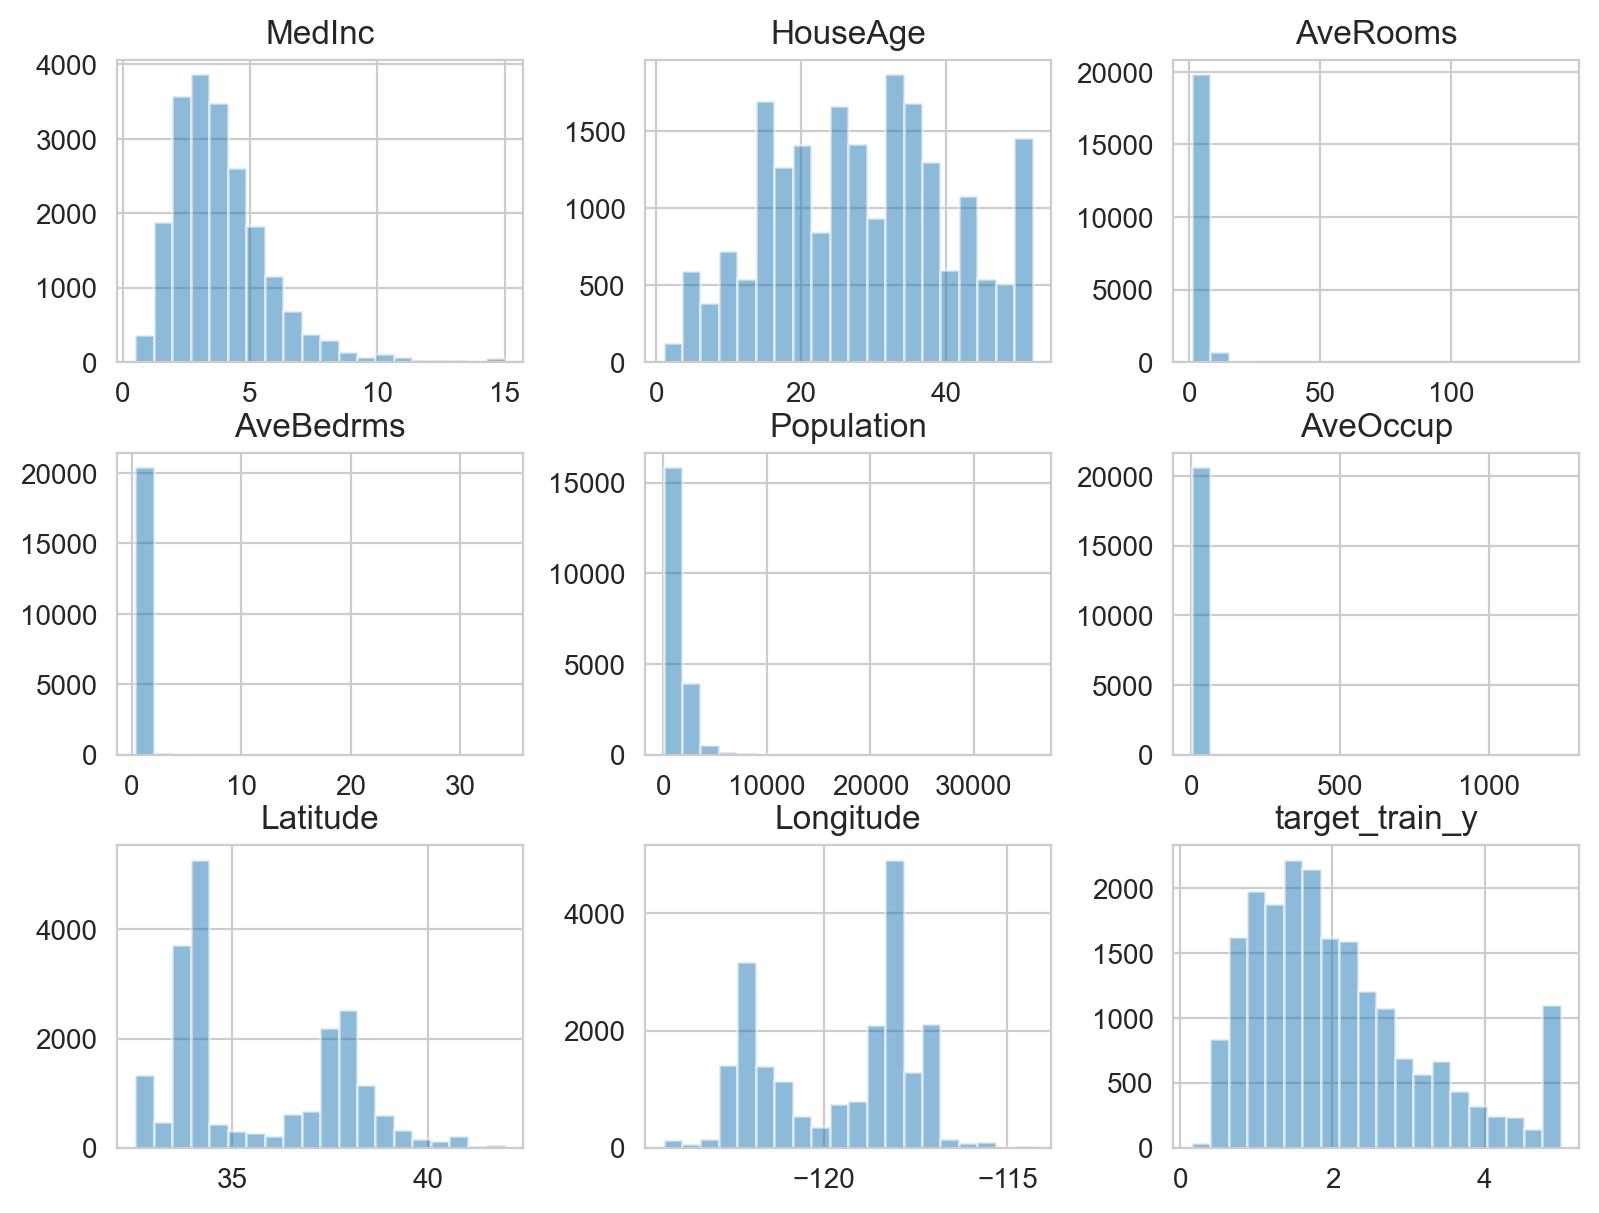

In [13]:
fig, ax_1 = plt.subplots(figsize=(8,6))

plt.tight_layout()
california_housing_df.hist(bins=20, ax=ax_1, alpha=0.5)
plt.show()

In [14]:
#Using the train_test_split function to automatichally split our data into train/test separations.
#Test size is automatichally 0.25.
X_train0, X_test, y_train0, y_test = train_test_split(
                 california_housing["data"],
                 california_housing["target"])

In [15]:
#train test splitting the above data so we can get a validaion data.
X_train1, X_validation, y_train1, y_validation = train_test_split(X_train0,y_train0)

In [16]:
X_train0.shape,X_test.shape,X_train1.shape,X_validation.shape

((15480, 8), (5160, 8), (11610, 8), (3870, 8))

In [17]:
sc = StandardScaler() #So we can normalize the data #In other situations we might use minscalar, etc.
X_train_s = sc.fit_transform(X_train1) #I want the data to fit on X_train1, and normalize it too. #X_train_scaled
X_validation_s = sc.transform(X_validation) #the next are only normalized, they were fitted on train before.
X_test_s = sc.transform(X_test)

In [18]:
model = keras.models.Sequential([keras.layers.Dense(50, activation="relu"), 
                                 keras.layers.Dense(10, activation="relu"),
                                 keras.layers.Dense(1)])
    #making a sequential model again
    #They are all dense, each row of our input layer is a vector. 
    #So each one isnt 2D (number*number) to require a "Flatten."
    #Thus, if the input of our Deep (sequential) model (the layers of it are Deep) is images, we need to use flatten for the initial layer.
    #Else, we only need dense layers (each row is 1D).
    #We only want to know the price of this house, so we only require one neuron at the output layer.
    #The activation is also not required, because the required number is not limited.
    #If we wanted to force the model to predict between 0 to 5, or -1 to 1, then we can use "activation," else it is not needed.


In [19]:
# model.summary()

# Model training APIs:
1) Compile method: Configures the model for training.
2) Fit method: Trains the model for a fixed number of epochs (dataset iterations).
3) Evaluate method: Returns the loss value & metrics values for the model in test mode.
4) Predict method: Generates output predictions for the input samples.
5) train_on_batch method: Runs a single gradient update on a single batch of data.
6) test_on_batch method: Test the model on a single batch of samples.
7) predict_on_batch method: Returns predictions for a single batch of samples.

## Compiling the model

In [22]:
model.compile(loss="mean_squared_error", #Choosing the loss function of the Regression model
              optimizer="sgd", #Stochastic gradiant descent
              metrics=["mean_absolute_error"])

## Fitting the model

In [24]:
history = model.fit(X_train_s, #Our trained X and validation X were scaled.
          y_train1,  # X_train0: y_train0 -> X_train1 : y_train1 -> X_validation: y_validation
          epochs=30,
          validation_data=(X_validation_s, y_validation)) 
          #Here, instead of validation_split, we will use validation_data because our validation data was specified.
#Loss: Mean squared error: to match with our data, we need to ^1/2 it.
# (Predicts - True)^2 / avg. all predicts : MSE
# Metric: Mean absolute error: Predicts - True (Epoch 30/30: val_mean_absolute_error: 0.3872)
# Due to metric, and since the unit of target is 100,000; the differentiation of price is about 0.38*100,000 ~ 38,000$.

Epoch 1/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7698 - mean_absolute_error: 0.6293 - val_loss: 0.5108 - val_mean_absolute_error: 0.5070
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5118 - mean_absolute_error: 0.5006 - val_loss: 0.4428 - val_mean_absolute_error: 0.4708
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4416 - mean_absolute_error: 0.4734 - val_loss: 0.4290 - val_mean_absolute_error: 0.4688
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4285 - mean_absolute_error: 0.4663 - val_loss: 0.4118 - val_mean_absolute_error: 0.4541
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4161 - mean_absolute_error: 0.4595 - val_loss: 0.4241 - val_mean_absolute_error: 0.4583
Epoch 6/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4083 - mean_absolute_error: 0.4540 - val_loss: 0.4076 - val_mean_absolute_error: 0.4613
Epoch 7/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4009 - mean_absolute_error: 0.4503 - v

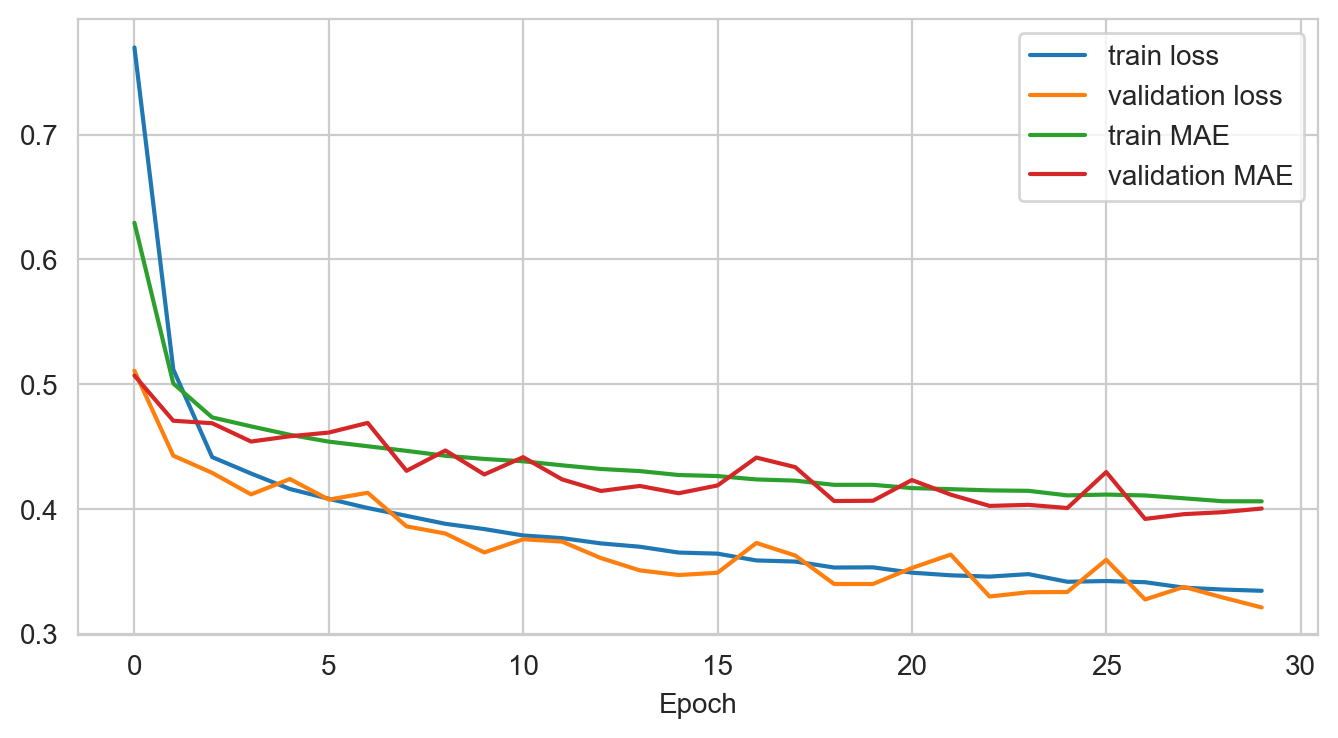

In [25]:
fig = plt.subplots(figsize=(8, 4))
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.plot(history.history["mean_absolute_error"], label="train MAE")
plt.plot(history.history["val_mean_absolute_error"], label="validation MAE")
plt.xlabel('Epoch')
plt.legend()
plt.show()

## Evaluating the model:

In [27]:
loss_eval, metrics_eval = model.evaluate(X_test_s, y_test, verbose=0)
print("Loss value: ",loss_eval,"\nMetrics value (MAE): ",metrics_eval)

Loss value:  0.2959114611148834 
Metrics value (MAE):  0.39108237624168396


## Predicting the model

In [29]:
x_test_8 = X_test_s[0:8]
x_test_8.shape

(8, 8)

In [30]:
pred_8 = model.predict(x_test_8).round(3)
pred_8

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


array([[2.413],
       [0.844],
       [0.879],
       [1.847],
       [2.848],
       [1.094],
       [1.093],
       [1.311]], dtype=float32)

In [31]:
y_test[0:8] #We will need to increase epochs, run the fit again, change the metrics/loss functions, etc. for better results

array([2.065, 0.652, 0.525, 2.115, 2.182, 1.1  , 0.975, 1.185])

------------

## Functional API

The Keras functional API is a way to create models that are more flexible than the keras.Sequential API.<br>
The functional API can handle models with non-linear topology, shared layers, and even multiple inputs or outputs.

The main idea is that a deep learning model is usually a directed acyclic graph (DAG) of layers. So the functional API is a way to build graphs of layers.

In [35]:
#This is a basic graph with three layers. Goal is to build this model with functional API, starting by creating an input node:
"""
(input)        ↧
       ↧       ↧
[Dense]        ↧
       ↧       ↧
[Dense]        ↧
       ↧       ↧
[Concatenate]  ↧
       ↧
[Dense]
       ↧
(output)
""";

In [36]:
X_train0.shape[1:] , X_train1.shape[1:]
#The shape of the data is set as a 8-dimensional vector. 

((8,), (8,))

In [37]:
input_ = keras.layers.Input(shape=X_train1.shape[1:])
#the input layer to give to the concatenate layer
#The batch size is always omitted since only the shape of each sample is specified.
input_.shape, input_.dtype

((None, 8), 'float32')

In [38]:
"""
The "layer call" action is like drawing an arrow from "inputs" to this layer you created. 
You're "passing" the inputs to the dense layer.
"""
hidden_layer1 = keras.layers.Dense(50, activation="relu")(input_)
hidden_layer2 = keras.layers.Dense(10, activation="relu")(hidden_layer1)
#the hidden layers (which are our usual dense ones)
hidden_layer1.shape, hidden_layer2.shape

((None, 50), (None, 10))

In [39]:
concatenate_layer = keras.layers.Concatenate()([input_, hidden_layer2])
#the concatenat layer, which recieves the input directly (wide & deep)
concatenate_layer.shape

(None, 18)

In [40]:
output = keras.layers.Dense(1)(concatenate_layer)
#The final and output layer of the model
output.shape

(None, 1)

In [41]:
model = keras.Model(inputs=[input_], outputs=[output])

In [42]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 8)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_3 (Dense)               │ (None, 50)                │             450 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_4 (Dense)               │ (None, 10)                │             510 │ dense_3[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 18)                │               0 │ input_layer_1[0][0],       │
│                               │                           │                 │ dense_4[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_5 (Dense)               │ (None, 1)                 │              19 │ concatenate[0][0]          │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 979 (3.82 KB)

 Trainable params: 979 (3.82 KB)

 Non-trainable params: 0 (0.00 B)

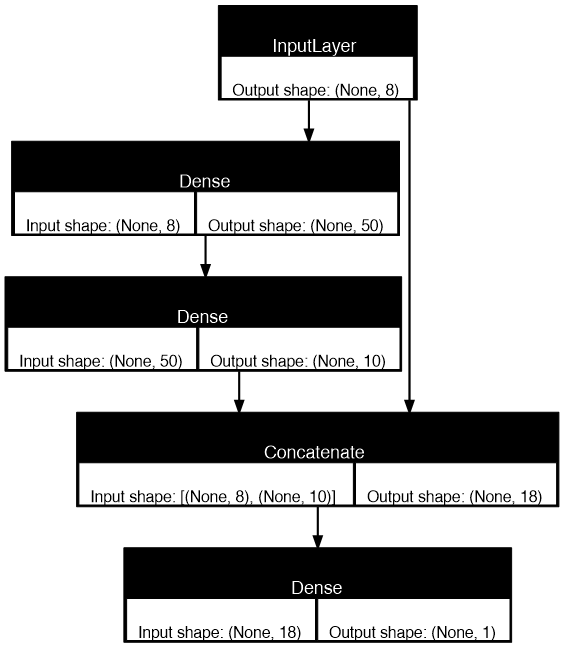

In [43]:
keras.utils.plot_model(model, show_shapes=True,dpi=80)

In [44]:
#We can reshape our train/tests, or use them as is
model.compile(loss="mean_squared_error",
              optimizer="sgd",
              metrics=["mean_absolute_error"])

In [45]:
model.fit(X_train_s, y_train1, epochs=30,
          validation_data=(X_validation_s, y_validation))

Epoch 1/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.0326 - mean_absolute_error: 0.6635 - val_loss: 0.6030 - val_mean_absolute_error: 0.5364
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6339 - mean_absolute_error: 0.5362 - val_loss: 0.5592 - val_mean_absolute_error: 0.5130
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5036 - mean_absolute_error: 0.5138 - val_loss: 0.5276 - val_mean_absolute_error: 0.5155
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4869 - mean_absolute_error: 0.5030 - val_loss: 0.4849 - val_mean_absolute_error: 0.4906
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4649 - mean_absolute_error: 0.4916 - val_loss: 0.4673 - val_mean_absolute_error: 0.4818
Epoch 6/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4505 - mean_absolute_error: 0.4817 - val_loss: 0.4481 - val_mean_absolute_error: 0.4787
Epoch 7/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4497 - mean_absolute_error: 0.4750 - v

In [46]:
loss_eval, metrics_eval = model.evaluate(X_test_s, y_test, verbose=0)
print("Loss value: ",loss_eval,"\nMetrics value (MAE): ",metrics_eval) #better results than before!

Loss value:  0.30046263337135315 
Metrics value (MAE):  0.39444127678871155


-----

### Two inputs:

In [49]:
#Before fitting the data, we need to recheck the test data according to the new shapes.
#Input 1 goes to the main network (the 6 column one).
X_train_s_1, X_train_s_2 = X_train_s[:, :6], X_train_s[:, -4:] #X_t_s_1 is the first 6 columns of X_t_s with all of its rows, and-
#-X_t_s_2 is the last 4 columns of X_t_s, with all of its rows.
X_validation_s_1, X_validation_s_2 = X_validation_s[:, :6], X_validation_s[:, -4:]
X_test_s_1, X_test_s_2 = X_test_s[:, :6], X_test_s[:, -4:]

In [50]:
X_train_s_1.shape,X_train_s_2.shape,X_train_s.shape

((11610, 6), (11610, 4), (11610, 8))

In [51]:
#We have two inputs here.
#Important part is the shapes dedicated to each layer. We can choose which many of the original for it to require.
input_1 = keras.layers.Input(shape=[6]) #6 columns for input 1
input_2 = keras.layers.Input(shape=[4]) #4 columns for input 2

In [52]:
hidden_layer1 = keras.layers.Dense(50, activation="relu")(input_1)
hidden_layer2 = keras.layers.Dense(10, activation="relu")(hidden_layer1)

In [53]:
concatenate_layer = keras.layers.Concatenate()([input_2, hidden_layer2]) 

In [54]:
output = keras.layers.Dense(1)(concatenate_layer) #similar to before

In [55]:
model = keras.Model(inputs=[input_1, input_2], outputs=[output]) #our final model has two inputs; the input is therefore a list here.

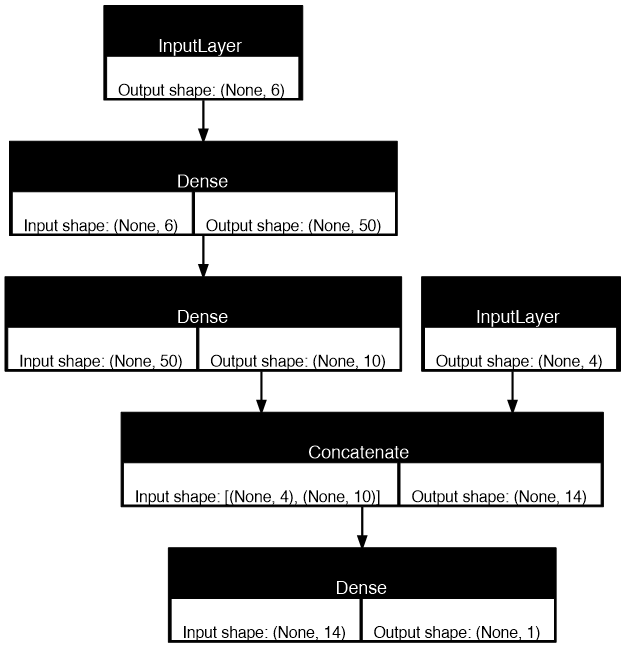

In [56]:
keras.utils.plot_model(model, show_shapes=True,dpi=80)

In [57]:
model.compile(loss="mean_squared_error",
              optimizer="sgd",
              metrics=["mean_absolute_error"])

In [58]:
model.fit((X_train_s_1, X_train_s_2), y_train1, epochs=30,
          validation_data=((X_validation_s_1, X_validation_s_2),
                           y_validation)) #Since we have two inputs/X_trains, we will have to give the initial X as a tuple.
                                          #For the input (X) part of the validation data, same goes as mentioned.

Epoch 1/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7852 - mean_absolute_error: 0.6179 - val_loss: 0.5338 - val_mean_absolute_error: 0.5334
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.8969 - mean_absolute_error: 0.6270 - val_loss: 0.6145 - val_mean_absolute_error: 0.5502
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1656 - mean_absolute_error: 0.5433 - val_loss: 0.4866 - val_mean_absolute_error: 0.5090
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2566 - mean_absolute_error: 0.5160 - val_loss: 0.4956 - val_mean_absolute_error: 0.4903
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4725 - mean_absolute_error: 0.4902 - val_loss: 0.4417 - val_mean_absolute_error: 0.4788
Epoch 6/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4481 - mean_absolute_error: 0.4831 - val_loss: 0.4297 - val_mean_absolute_error: 0.4699
Epoch 7/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4333 - mean_absolute_error: 0.4758 - v

In [59]:
loss_eval_tot, metrics_eval_tot = model.evaluate((X_test_s_1,X_test_s_2), y_test, verbose=0)
print("Loss value: ",loss_eval_tot,"\nMetrics value (MAE): ",metrics_eval_tot) #more better results than before!

Loss value:  0.35231679677963257 
Metrics value (MAE):  0.42612218856811523


------------

### Two outputs:

Now to add $\textbf{two}$ outputs: aka a "helper"/"aux" output for one of the hidden layers.<br>
For example, it can be used for both classification and regression. It doesn't simply mean only two neurons.
To mention an exmaple, it can identify both:
- What kind of an object the image is (classification), and
- Its location (regression).

In [63]:
#Same inputs
input_1 = keras.layers.Input(shape=[6])
input_2 = keras.layers.Input(shape=[4])

In [64]:
#Same hidden layers and same concatenate layer
hidden_layer1 = keras.layers.Dense(50, activation="relu")(input_1)
hidden_layer2 = keras.layers.Dense(10, activation="relu")(hidden_layer1)
concatenate_layer = keras.layers.Concatenate()([input_2, hidden_layer2])

In [65]:
#Here, we will have two outputs. The input to the helper output will be the second hidden layer.
output = keras.layers.Dense(1, name="output")(concatenate_layer)
helper_output = keras.layers.Dense(1, name="helper_output")(hidden_layer2)

In [66]:
model_f = keras.Model(inputs=[input_1, input_2],
                    outputs=[output, helper_output])

In [67]:
model_f.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)    │ (None, 6)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_9 (Dense)               │ (None, 50)                │             350 │ input_layer_4[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_5 (InputLayer)    │ (None, 4)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_10 (Dense)              │ (None, 10)                │             510 │ dense_9[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_2 (Concatenate)   │ (None, 14)                │               0 │ input_layer_5[0][0],       │
│                               │                           │                 │ dense_10[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ output (Dense)                │ (None, 1)                 │              15 │ concatenate_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ helper_output (Dense)         │ (None, 1)                 │              11 │ dense_10[0][0]             │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 886 (3.46 KB)

 Trainable params: 886 (3.46 KB)

 Non-trainable params: 0 (0.00 B)

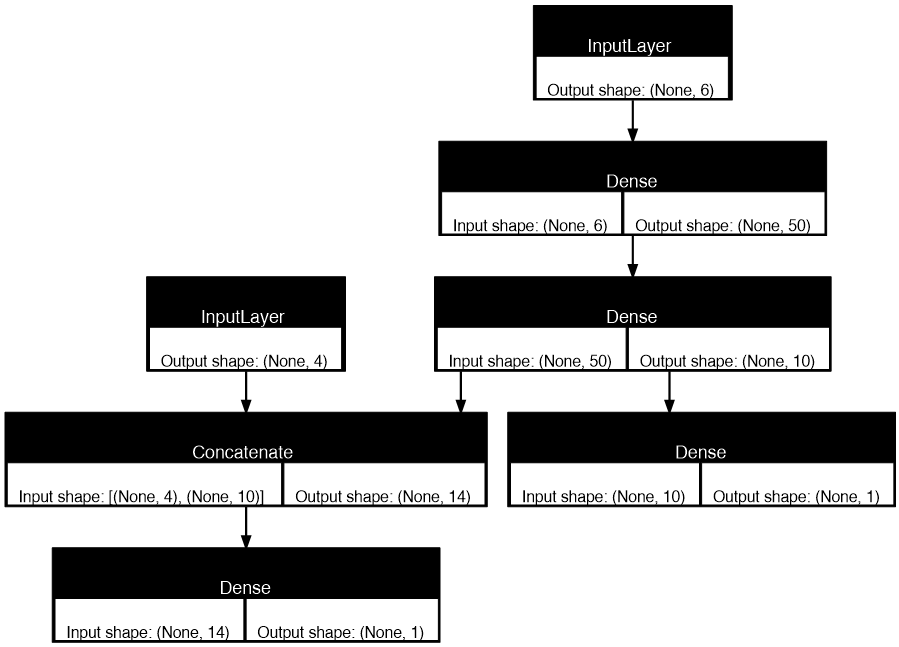

In [68]:
keras.utils.plot_model(model_f, show_shapes=True,dpi=80)

In [69]:
#Note that here, we solely are focusing on Regression.
#If one output was Regression and the other was Classification, then this method for loss/metrics wouldn't make sense.
model_f.compile(loss={"output": ["mean_squared_error"], "helper_output":["mean_squared_error"]},
                loss_weights=[0.8, 0.2], #80/20 
                #Considering weight of 0.8 for the main output and 0.2 for the helper output,
                #because we don't want it to affect our loss as greatly.
                #In other words, these are the weights that are affecting the loss used by the SGD algorithm.
                optimizer="sgd",
                metrics={"output": ["mean_absolute_error"],"helper_output": ["mean_absolute_error"]}
               )

In [70]:
model_f.fit((X_train_s_1, X_train_s_2), 
            (y_train1, y_train1),  #Since we have 2 outputs, we will consider 2 targets.
            epochs=30,
            validation_data=((X_validation_s_1, X_validation_s_2),(y_validation, y_validation))
           )

Epoch 1/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - helper_output_loss: 1.2118 - helper_output_mean_absolute_error: 0.7678 - loss: 0.9116 - output_loss: 0.8364 - output_mean_absolute_error: 0.6527 - val_helper_output_loss: 0.6252 - val_helper_output_mean_absolute_error: 0.5814 - val_loss: 0.5756 - val_output_loss: 0.5632 - val_output_mean_absolute_error: 0.5493
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - helper_output_loss: 0.6079 - helper_output_mean_absolute_error: 0.5672 - loss: 0.5643 - output_loss: 0.5535 - output_mean_absolute_error: 0.5291 - val_helper_output_loss: 0.5732 - val_helper_output_mean_absolute_error: 0.5511 - val_loss: 0.5149 - val_output_loss: 0.5004 - val_output_mean_absolute_error: 0.5091
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - helper_output_loss: 0.5702 - helper_output_mean_absolute_error: 0.5496 - loss: 0.5101 - output_loss: 0.4951 - output_mean_absolute_error: 0.5038 - val_helper_output_loss: 0.5498 - val_helper_output_mean_absolute_er

In [71]:
model_f.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)    │ (None, 6)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_9 (Dense)               │ (None, 50)                │             350 │ input_layer_4[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_5 (InputLayer)    │ (None, 4)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_10 (Dense)              │ (None, 10)                │             510 │ dense_9[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_2 (Concatenate)   │ (None, 14)                │               0 │ input_layer_5[0][0],       │
│                               │                           │                 │ dense_10[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ output (Dense)                │ (None, 1)                 │              15 │ concatenate_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ helper_output (Dense)         │ (None, 1)                 │              11 │ dense_10[0][0]             │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 888 (3.47 KB)

 Trainable params: 886 (3.46 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [72]:
model_f.evaluate((X_test_s_1,X_test_s_2), (y_test,y_test), verbose=0)
# ['Total loss',
#  'main_output_loss',
#  'helper_output_loss',
#  'main_output_acc',
#  'helper_output_acc']

[0.34910285472869873,
 0.33582597970962524,
 0.4026860296726227,
 0.4757651090621948,
 0.4267710745334625]

In [73]:
#Saving the model to use it later
model_f.save("cali_house_reg_model_f.h5")

In [74]:
model_f_reg = keras.models.load_model("cali_house_reg_model_f.h5")

In [75]:
model_f_reg.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)    │ (None, 6)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_9 (Dense)               │ (None, 50)                │             350 │ input_layer_4[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_5 (InputLayer)    │ (None, 4)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_10 (Dense)              │ (None, 10)                │             510 │ dense_9[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_2 (Concatenate)   │ (None, 14)                │               0 │ input_layer_5[0][0],       │
│                               │                           │                 │ dense_10[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ output (Dense)                │ (None, 1)                 │              15 │ concatenate_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ helper_output (Dense)         │ (None, 1)                 │              11 │ dense_10[0][0]             │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 888 (3.47 KB)

 Trainable params: 886 (3.46 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

--------

## Subclass API

In the <a href="https://keras.io/guides/making_new_layers_and_models_via_subclassing/#:~:text=class%20ResNet,filepath%2Ekeras%29"> Keras Website </a> for making new new layers/models with subclasses, it is mentioned that one can use "the Model class to define the outer model – the object you will train."

The Model class has the same API as Layer, with the following differences:
- It exposes built-in training, evaluation, and prediction loops (model.fit(), model.evaluate(), model.predict()).
- It exposes the list of its inner layers, via the model.layers property.
- It exposes saving and serialization APIs (save(), save_weights()...)
- Effectively, the Layer class corresponds to what we refer to in the literature as a "layer" (as in "convolution layer" or "recurrent layer") or as a "block" (as in "ResNet block" or "Inception block").
- Meanwhile, the Model class corresponds to what is referred to in the literature as a "model" (as in "deep learning model") or as a "network" (as in "deep neural network").

For instance:
```
class ResNet(keras.Model):

    def __init__(self, num_classes=1000):
        super().__init__()
        self.block_1 = ResNetBlock()
        self.block_2 = ResNetBlock()
        self.global_pool = layers.GlobalAveragePooling2D()
        self.classifier = Dense(num_classes)

    def call(self, inputs):
        x = self.block_1(inputs)
        x = self.block_2(x)
        x = self.global_pool(x)
        return self.classifier(x)

resnet = ResNet()
dataset = ...
resnet.fit(dataset, epochs=10)
resnet.save(filepath.keras)

```


Here, we will define a class for Wide and Deep networks, which is definitely a Model class. It will include defining the hidden layers, outputs, and further on. We will redefine the previously made model (model_f) but this time, using subclasses:

In [80]:
class WideAndDeepANN(keras.Model):
    def __init__(self, activation="relu", **kwargs): 
        #kwargs : key-word-arguement. 
        #**kwargs in a function: it means we can give it however many kwargs as we want.
        super().__init__(**kwargs) 
        #Input is the kwargs. 
        #Any input that is considered for keras.Model, we can push onto the WideAndDeep model, which it will also consider it for the Keras.Model. 
        self.hidden_layer_1 = keras.layers.Dense(50, activation=activation) #the activation was considered as "relu".
        self.hidden_layer_2 = keras.layers.Dense(10, activation=activation)
        self.final_output   = keras.layers.Dense(1)
        self.helper_output  = keras.layers.Dense(1)
        #These are all initially required layers. The connections, outputs and inputs will be in the call function.
    
    def call(self, inputs):
        input_1, input_2 = inputs #since we will give our inputs as a list to the model.
        h1_out = self.hidden_layer_1(input_1) #the hidden_layer_1 should have the input_1 input, and its output will be h1_out.
        h2_out = self.hidden_layer_2(h1_out)  # ``` except its input will be the output of the previous hidden layer.
        concat_out = keras.layers.concatenate([input_2, h2_out]) #This is a connection layer, so it will be in the class function.
        final_out = self.final_output(concat_out)
        helper_out = self.helper_output(h2_out)
        return final_out, helper_out

In [81]:
model_sub = WideAndDeepANN()

In [82]:
model_sub.compile(loss=["mean_squared_error", "mean_squared_error"],
              loss_weights = [0.8, 0.2],
              optimizer="sgd",
              metrics=["mean_absolute_error","mean_absolute_error"])

In [83]:
model_sub.fit((X_train_s_1, X_train_s_2), (y_train1, y_train1), epochs=30,
          validation_data=((X_validation_s_1, X_validation_s_2),
                           (y_validation, y_validation)))

Epoch 1/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.3690 - mean_absolute_error: 0.7410 - mean_absolute_error_1: 0.7855 - mean_squared_error_loss: 1.6393 - val_loss: 0.5923 - val_mean_absolute_error: 0.5569 - val_mean_absolute_error_1: 0.5825 - val_mean_squared_error_loss: 0.6582
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2689 - mean_absolute_error: 0.6102 - mean_absolute_error_1: 0.6259 - mean_squared_error_loss: 0.9753 - val_loss: 0.6634 - val_mean_absolute_error: 0.5821 - val_mean_absolute_error_1: 0.6101 - val_mean_squared_error_loss: 0.7564
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5673 - mean_absolute_error: 0.5317 - mean_absolute_error_1: 0.5569 - mean_squared_error_loss: 0.6494 - val_loss: 0.5169 - val_mean_absolute_error: 0.5191 - val_mean_absolute_error_1: 0.5439 - val_mean_squared_error_loss: 0.5552
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5092 - mean_absolute_error: 0.5066 - mean_absolute_error_1: 0.5378 -

In [84]:
model_sub.summary()

Model: "wide_and_deep_ann"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 50)                  │             350 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │             510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 888 (3.47 KB)

 Trainable params: 886 (3.46 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [85]:
model_sub.evaluate((X_test_s_1,X_test_s_2), (y_test,y_test), verbose=0)

[0.3538868725299835,
 0.4257027208805084,
 0.4257027208805084,
 0.4080713093280792,
 0.4080713093280792,
 0.4758135676383972]

In [86]:
model_sub.save("cali_house_reg_model_sub.h5")

In [87]:
model_reg_sub = keras.models.load_model("cali_house_reg_model_sub.h5")
model_reg_sub.summary()

#The error is expected because the .h5 format tries to save the architecture by config, 
#but subclass models don't have a static config.
#this is preferred: model_sub.save("cali_house_reg_model_sub")
#OR: we can save the weights instead!

ValueError: Unknown layer: 'WideAndDeepANN'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

---------------

## Callback API

A callback is an object that can perform actions at various stages of training (e.g. at the start or end of an epoch, before or after a single batch, etc).

You can pass a list of callbacks (as the keyword argument callbacks) to the .fit() method of a model:
```
my_callbacks = [
    keras.callbacks.EarlyStopping(patience=2),
    keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    keras.callbacks.TensorBoard(log_dir='./logs'),
]
model.fit(dataset, epochs=10, callbacks=my_callbacks)
```

- `ModelCheckpoint` callback is used in conjunction with training using `model.fit()` to save a model or weights (in a checkpoint file) at some interval, so the model or weights can be loaded later to continue the training from the state saved.
- `EarlyStopping` class is used to stop training when a monitored metric has stopped improving. Assuming the goal of a training is to minimize the loss; with this, the metric to be monitored would be 'loss', and mode would be 'min'. A `model.fit()` training loop will check at end of every epoch whether the loss is no longer decreasing, considering the min_delta and patience if applicable. Once it's found no longer decreasing, `model.stop_training` is marked True and the training terminates [It is a ML regularization].

In [97]:
model_checkpoint_callback = keras.callbacks.ModelCheckpoint("model_cb_reg_housing.h5",
                                                         save_best_only=True)
earlystopping_callback = keras.callbacks.EarlyStopping(patience=5,
                             restore_best_weights=True)

In [99]:
model_f.fit((X_train_s_1, X_train_s_2), (y_train1, y_train1), epochs=5,
          validation_data=((X_validation_s_1, X_validation_s_2),
                           (y_validation, y_validation)),
           callbacks=[model_checkpoint_callback, earlystopping_callback])

Epoch 1/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - helper_output_loss: 0.4441 - helper_output_mean_absolute_error: 0.4873 - loss: 0.4747 - output_loss: 0.4823 - output_mean_absolute_error: 0.4464

363/363 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - helper_output_loss: 0.4462 - helper_output_mean_absolute_error: 0.4866 - loss: 0.4375 - output_loss: 0.4352 - output_mean_absolute_error: 0.4419 - val_helper_output_loss: 0.4328 - val_helper_output_mean_absolute_error: 0.4788 - val_loss: 0.3780 - val_output_loss: 0.3644 - val_output_mean_absolute_error: 0.4303
Epoch 2/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - helper_output_loss: 0.4461 - helper_output_mean_absolute_error: 0.4844 - loss: 0.3880 - output_loss: 0.3734 - output_mean_absolute_error: 0.4355 - val_helper_output_loss: 0.4299 - val_helper_output_mean_absolute_error: 0.4724 - val_loss: 0.3784 - val_output_loss: 0.3656 - val_output_mean_absolute_error: 0.4245
Epoch 3/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - helper_output_loss: 0.4363 - helper_output_mean_absolute_error: 0.4820 - loss: 0.3919 - output_loss: 0.3808 - output_mean_absolute_error: 0.4385

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - helper_output_loss: 0.4445 - helper_output_mean_absolute_error: 0.4841 - loss: 0.3931 - output_loss: 0.3801 - output_mean_absolute_error: 0.4368 - val_helper_output_loss: 0.4285 - val_helper_output_mean_absolute_error: 0.4803 - val_loss: 0.3746 - val_output_loss: 0.3611 - val_output_mean_absolute_error: 0.4314
Epoch 4/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - helper_output_loss: 0.4443 - helper_output_mean_absolute_error: 0.4829 - loss: 0.3862 - output_loss: 0.3716 - output_mean_absolute_error: 0.4354 - val_helper_output_loss: 0.4300 - val_helper_output_mean_absolute_error: 0.4806 - val_loss: 0.3779 - val_output_loss: 0.3649 - val_output_mean_absolute_error: 0.4340
Epoch 5/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - helper_output_loss: 0.4458 - helper_output_mean_absolute_error: 0.4849 - loss: 0.3931 - output_loss: 0.3798 - output_mean_absolute_error: 0.4369 - val_helper_output_loss: 0.4359 - val_helper_output_mean_absolute_error: 0.4824 -

In [101]:
class Callback_own(keras.callbacks.Callback):
    def on_train_end(self, logs=None):
        print("")
    def on_epoch_end(self, epoch, logs):
        print(logs["val_loss"])

In [103]:
CB = Callback_own()

In [105]:
tb_callback = keras.callbacks.TensorBoard("tb_log")

In [107]:
model_f.fit((X_train_s_1, X_train_s_2), (y_train1, y_train1), epochs=5,
          validation_data=((X_validation_s_1, X_validation_s_2),
                           (y_validation, y_validation)),
           callbacks=[tb_callback])

Epoch 1/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - helper_output_loss: 0.4484 - helper_output_mean_absolute_error: 0.4844 - loss: 0.3988 - output_loss: 0.3864 - output_mean_absolute_error: 0.4393 - val_helper_output_loss: 0.4286 - val_helper_output_mean_absolute_error: 0.4795 - val_loss: 0.3805 - val_output_loss: 0.3685 - val_output_mean_absolute_error: 0.4329
Epoch 2/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - helper_output_loss: 0.4433 - helper_output_mean_absolute_error: 0.4821 - loss: 0.3871 - output_loss: 0.3731 - output_mean_absolute_error: 0.4357 - val_helper_output_loss: 0.4284 - val_helper_output_mean_absolute_error: 0.4832 - val_loss: 0.3751 - val_output_loss: 0.3618 - val_output_mean_absolute_error: 0.4334
Epoch 3/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - helper_output_loss: 0.4429 - helper_output_mean_absolute_error: 0.4831 - loss: 0.3855 - output_loss: 0.3710 - output_mean_absolute_error: 0.4350 - val_helper_output_loss: 0.4282 - val_helper_output_mean_absolute_error

In [110]:
%load_ext tensorboard

In [112]:
%tensorboard --logdir=./tb_log 

-------------

## Hyperparameter optimization

In [114]:
def ann_model(number_of_hidden_layers=1,
              number_of_neurons=50,
              lr=0.01):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=[8]))
    for hidden_layer in range(number_of_hidden_layers):
        model.add(keras.layers.Dense(number_of_neurons, activation="selu"))
    model.add(keras.layers.Dense(1))
    sgd = keras.optimizers.SGD(lr=lr)
    model.compile(loss="mse", optimizer=sgd)
    return model

In [146]:
!pip install scikeras

In [166]:
from scikeras.wrappers import KerasRegressor
keras_sk_reg = KerasRegressor(build_fn=ann_model)

In [168]:
param_grid = {"number_of_hidden_layers":[1, 3, 5],
              "number_of_neurons":[50, 100, 150],
              "lr":[0.001, 0.001, 0.1]}

In [170]:
keras_sk_reg_gs = GridSearchCV(keras_sk_reg, param_grid)

In [172]:
keras_sk_reg_gs.fit(X_train_s, y_train1, epochs=10,
                    validation_data=(X_validation, y_validation),
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

ValueError: Invalid parameter lr for estimator KerasRegressor.
This issue can likely be resolved by setting this parameter in the KerasRegressor constructor:
`KerasRegressor(lr=0.001)`
Check the list of available parameters with `estimator.get_params().keys()`

---------------